In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
# For these materials and x-ray sources; determine the thickness where I/I_0 = 0.5 and 0.9

# Plot scattering by depth

In [2]:
# From powder diffraction, Theory and Practice by Dinnebier & Billinge
# f(s)=f_0(s)+f'+if''
# f^2=(f_0+f')^2+f''^2

In [3]:
# Cu-Kalpha radiation, Fe material

# From .cif file
atoms_per_cell=2

# from GSAS-II fprime code, Cu-Kalpha radiation, Fe material
f_prime = -1.134
f_double_prime= 3.197
mu_barns= 27759.97 #barns/atom

# from GSAS-II absorb code, Cu-Kalpha radiation, Fe material
# packing 0.85 to get powder density of 7.885 g/cm^3
# estimated iron density is 9.277 otherwise

mu_cm=2359.6 # cm^-1
mu_um=2359.6/10000 # um^-1

In [ ]:
# Cu-Kalpha radiation, SRM487 Austenite

# From .cif file
atoms_per_cell=4

# Transcribed from .cif file
element_list=['Fe','Cr','Ni','Si','C','Mn']
element_fraction=[0.526, 0.264,  0.191, 0.015, 0.002, 0.002]

# from GSAS-II fprime code, Cu-Kalpha radiation, SRM487 Austenite
# From fprime code
element_f_prime=[-1.134,-0.164,-3.003,0.254,0.018,-.530]
element_f_double_prime=[3.197,2.444,0.509,0.330,0.009,2.805]
element_mu_barns=[27759.97,21217.63,4420.01,2866.66,78.60,24354.46]

f_prime= -1.134
f_double_prime= 3.197
mu_barns= 27759.97 #barns/atom

# from GSAS-II absorb code, Cu-Kalpha radiation, SRM487 Austenite
# packing 0.85 to get powder density of 7.741 g/cm^3
# Total  μ=   1795.78 cm⁻¹, Total μR=     71.83, Transmission exp(-2μR)=    0.0000%
# Est. density= 9.107 g/cm³, Powder density=7.741 g/cm³
# X-ray small angle scattering contrast   5209.43*10²°/cm⁴
# Anomalous X-ray small angle scattering contrast   4730.84*10²°/cm⁴

mu_cm=1795.78 # cm^-1
mu_um=1795.78/10000 # um^-1

In [ ]:
# Cu-Kalpha radiation, SRM487 Ferrite (martensite)

# Transcribed from .cif file
element_list=['Fe','Cr','Ni','Si','C','Mn']
element_fraction=[0.806, 0.177,  0.001, 0.016, 0.001, 0.002]

# from GSAS-II fprime code, 
element_f_prime=[-1.134,-0.164,-3.003,0.254,0.018,-.530]
element_f_double_prime=[3.197,2.444,0.509,0.330,0.009,2.805]
element_mu_barns=[27759.97,21217.63,4420.01,2866.66,78.60,24354.46]

f_prime= -1.134
f_double_prime= 3.197
mu_barns= 27759.97 #barns/atom

# from GSAS-II absorb code, Cu-Kalpha radiation, SRM487 Austenite
# packing 0.85 to get powder density of 7.711 g/cm^3
# Total  μ=   2218.59 cm⁻¹, Total μR=     88.74, Transmission exp(-2μR)=    0.0000%
# Est. density= 9.072 g/cm³, Powder density=7.711 g/cm³
# X-ray small angle scattering contrast   5125.33*10²°/cm⁴
# Anomalous X-ray small angle scattering contrast   4755.62*10²°/cm⁴


mu_cm=2218.59 # cm^-1
mu_um=2218.59/10000 # um^-1

### Data for 3 possible hkls
#### Run only 1 of the 3 examples

In [4]:
# from PureFe example, ferrite 110 peak 
twotheta_deg=44.25 #degrees
theta_deg=22.125
Fcsq = 1207.03 # (f_0*atoms_per_cell)^2
lambda_Kalpha=1.5405
sin_theta_div_lambda=.244
multiplicity=12


# International Tables for Crystallography Table volume C 6.1.1.1
#sin_theta_div_lambda=.24 (44.25 two_theta, 110 ferrite)
f_elem=18.685


In [ ]:

# from PureFe example, ferrite 211 peak 
twotheta_deg=81.44 #degrees
theta_deg=40.72
Fcsq = 559.61
lambda_Kalpha=1.5405
sin_theta_div_lambda=.423
atoms_per_cell=2
multiplicity=24

# International Tables for Crystallography Table volume C 6.1.1.1

#sin_theta_div_lambda=.42 (81.44 two_theta, 211 ferrite)
f_elem=13.328



In [ ]:


# from PureFe example, ferrite 222 peak 
twotheta_deg=134.61 #degrees
theta_deg=67.305
Fcsq = 270.73
lambda_Kalpha=1.5405
sin_theta_div_lambda=.599
atoms_per_cell=2
multiplicity=8

# International Tables for Crystallography Table volume C 6.1.1.1
#sin_theta_div_lambda=.6 (134.61 two_theta, 222 ferrite)
f_elem=9.753



In [5]:
# check structure factor
# not sure if f_double_prime is multiplied by atoms per cell or not...
FF=(atoms_per_cell*(f_elem+f_prime))**2+(atoms_per_cell*f_double_prime)**2
print(FF)

1273.0336399999997


In [6]:
# Set max path length
Max_intensity_drop=1/1000
t_max_cm=(1/-mu_cm)*np.log(Max_intensity_drop) # change to mu_um?
t_max_um=t_max_cm*10000 # this would go away
print(t_max_um) 

29.27511137049558


In [7]:
# Set initial Intensity in x-ray counts
I0=1000000

In [8]:
# create a series of points along a line
steps=25

x_list=np.linspace(0,t_max_um*np.cos(np.radians(theta_deg)),num=steps)
y_list=np.linspace(0,-t_max_um*np.sin(np.radians(theta_deg)),num=steps)

In [9]:
df_endpoints = pd.DataFrame(data={'x': x_list, 'y': y_list})


In [10]:
df_endpoints['length']=np.sqrt(df_endpoints['x']**2+df_endpoints['y']**2)
df_endpoints['I']=I0 *  np.exp(-mu_um * df_endpoints['length'])

In [11]:
df_endpoints

,x,y,length,I
0,0.000000,0.000000,0.000000,1000000.000000
1,1.129976,-0.459410,1.219796,749894.209332
2,2.259952,-0.918820,2.439593,562341.325190
3,3.389928,-1.378230,3.659389,421696.503429
4,4.519903,-1.837640,4.879185,316227.766017
5,5.649879,-2.297050,6.098982,237137.370566
6,6.779855,-2.756460,7.318778,177827.941004
7,7.909831,-3.215870,8.538574,133352.143216
8,9.039807,-3.675280,9.758370,100000.000000
9,10.169783,-4.134690,10.978167,74989.420933


In [12]:
x_mid=[]
y_mid=[]
delta_I=[]
for i in range(0,len(df_endpoints)-1):
    #print(i)
    x_mid.append((df_endpoints['x'].iloc[i]+df_endpoints['x'].iloc[i+1])/2)
    y_mid.append((df_endpoints['y'].iloc[i]+df_endpoints['y'].iloc[i+1])/2)
    delta_I.append(df_endpoints['I'].iloc[i]-df_endpoints['I'].iloc[i+1])
    
df_mid = pd.DataFrame(data={'x_mid': x_mid, 'y_mid': y_mid, 'delta_I':delta_I})

In [13]:
# It's not clear to me how this should properly be calculated.  
# f_prime can occasionally take positive values at higher energies.
# That seems to imply a flourescing photon can cause additional scattering?

# For now I am using rule of mixtures with absolute values
df_mid['travel_dist']=np.sqrt(df_mid['x_mid']**2+df_mid['y_mid']**2)

df_mid['absorbed']=df_mid['delta_I']*(f_double_prime/(f_double_prime+abs(f_prime)+f_elem))
df_mid['anomalous']=df_mid['delta_I']*(abs(f_prime)/(f_double_prime+abs(f_prime)+f_elem))
df_mid['scattered']=df_mid['delta_I']*(f_elem/(f_double_prime+abs(f_prime)+f_elem))

#scattered, but not absorbed on return to the surface
df_mid['Escaped']=df_mid['scattered'] *  np.exp(-mu_um * df_mid['travel_dist'])
df_mid['RelativeEscaped']=df_mid['Escaped']/I0

In [14]:
# Centroid of distribution
Centroid_y=np.sum(df_mid['Escaped']*df_mid['y_mid'])/np.sum(df_mid['Escaped'])

Centroid_x=np.sum(df_mid['Escaped']*df_mid['x_mid'])/np.sum(df_mid['Escaped'])

In [15]:
#df_mid

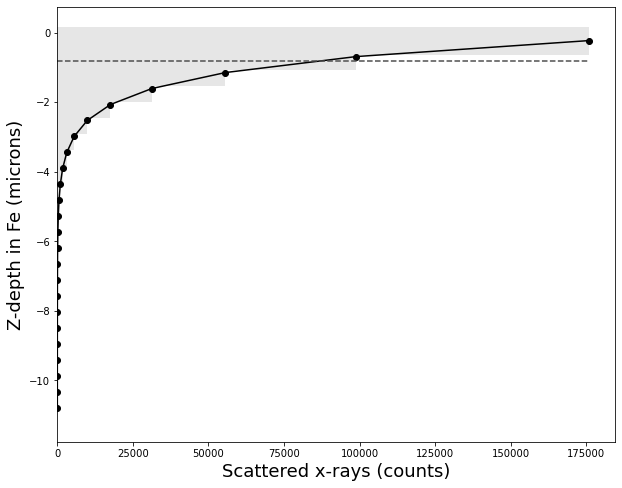

In [16]:
plt.figure(figsize=(10,8))
plt.barh( df_mid['y_mid'],df_mid['Escaped'],color='0.9')
plt.plot( df_mid['Escaped'], df_mid['y_mid'], 'ko', linestyle="-")
plt.hlines(Centroid_y, 0, df_mid['Escaped'].iloc[0], color='0.3',linestyle="--")

#plt.plot(theta, z1, label='75% Absorption')
#plt.plot(theta, z2, label='50% Absorption')

#plt.legend()

plt.ylabel('Z-depth in Fe (microns)', fontsize=18)
plt.xlabel('Scattered x-rays (counts)', fontsize=18)
#plt.title('Z-depth vs Theta for fractional intensities with a copper k-alpha source')


plt.show()

In [17]:
print(Centroid_y)

-0.8199833627565323


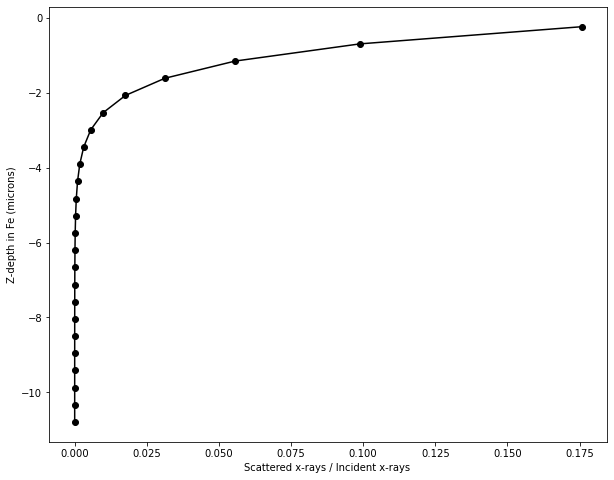

In [18]:
plt.figure(figsize=(10,8))
plt.plot( df_mid['RelativeEscaped'] ,df_mid['y_mid'], 'ko', linestyle="-")


#plt.plot(theta, z1, label='75% Absorption')
#plt.plot(theta, z2, label='50% Absorption')

#plt.legend()

plt.ylabel('Z-depth in Fe (microns)')
plt.xlabel('Scattered x-rays / Incident x-rays ')
#plt.title('Z-depth vs Theta for fractional intensities with a copper k-alpha source')


plt.show()

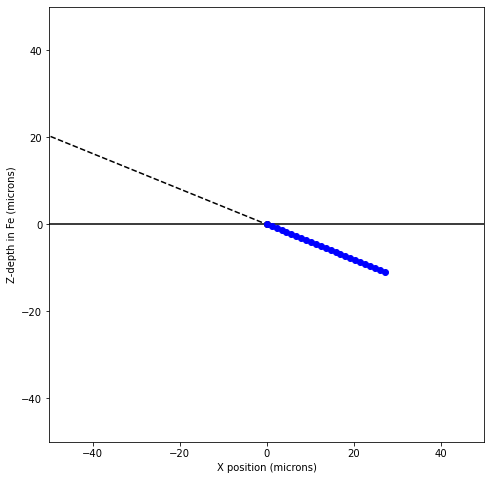

In [19]:
# layout 
plt.figure(figsize=(10,8))

#start x-ray height
xray_start=50 

plt.hlines(0, -150, 150, color='k')
plt.plot([-xray_start/np.tan(np.radians(theta_deg)),0], [xray_start,0] , 'ko', linestyle="--")
plt.plot(x_list, y_list , 'bo', linestyle="--")


#plt.plot(theta, z1, label='75% Absorption')
#plt.plot(theta, z2, label='50% Absorption')

#plt.legend()

plt.xlabel('X position (microns)')
plt.ylabel('Z-depth in Fe (microns)')
#plt.title('Z-depth vs Theta for fractional intensities with a copper k-alpha source')

plt.xlim(-50,50)
plt.ylim(-50,50)
plt.gca().set_aspect('equal')
plt.show()

In [ ]:
plt.figure(figsize=(10,8))
plt.bar( df_mid['x_mid'],df_mid['Escaped'],color='0.9')
plt.plot( df_mid['x_mid'], df_mid['Escaped'], 'ko', linestyle="-")
plt.vlines(Centroid_x, 0, df_mid['Escaped'].iloc[0], color='0.3',linestyle="--")
plt.xlim([0,30])

#plt.plot(theta, z1, label='75% Absorption')
#plt.plot(theta, z2, label='50% Absorption')

#plt.legend()

plt.ylabel('Scattered x-rays (counts)')
plt.xlabel('X distance in Fe (microns)')
#plt.title('Z-depth vs Theta for fractional intensities with a copper k-alpha source')


plt.show()

In [ ]:
print(Centroid_x)

## Number of particles
The meaning of particles will depend on if the material is polycrystalline or a powder

In [ ]:
# SRM487 Particle, Scan parameters

# Particle Size data
# Figure out how to enter non-spherical data (likely ellipse?)

# Austenite powder between 53 um to 44 um; assuming 50
# powder_size_um=50
# powder_size_mm=powder_size_um/1000

# Ferrite (martensite) powder between 44 um to 37 um; assuming 40
powder_size_um=40
powder_size_mm=powder_size_um/1000

In [ ]:
# From ASTM E112, Appendix A2 "EQUATIONS FOR CONVERSIONS AMONG VARIOUS GRAIN SIZE MEASUREMENTS"
# Assumes spherical grains, and many other assumptions...

# D_bar == Mean spatial (volumetric) grain diameter
# l_bar == Mean lineal intercept length
# A_bar == Mean grain cross sectional area
# N_bar_A == Number of grains per unit area


D_bar = powder_size_mm
l_bar= D_bar/1.5
A_bar = ((l_bar)**2)*(4/np.pi)
N_bar_A = 1/A_bar


In [ ]:
print(D_bar,l_bar,A_bar, N_bar_A)

In [ ]:
### X-ray system scan parameters from E211110-AAC-001_0019

# Figure out a way to read these?  Also angular spread from detector distance
# 0.6 mm slit, 1 mm collimator (snout)
# seems like the spillover is neligible (X_centroid above) for ~mm sizes, but probably should include

#options should be circle or rectangle
beam_shape='circle'
beam_size_axis1_mm=1

#probably some additional try/except here
if beam_shape=='circle':
    beam_size_axis2_mm=beam_size_axis1_mm
    

#if the sample or x-ray system was moved
raster_length_axis1_mm=4
raster_length_axis2_mm=4

raster_area_mm=(raster_length_axis1_mm+beam_size_axis1_mm)*(raster_length_axis2_mm+beam_size_axis2_mm)

In [ ]:
# Will need phase fraction value, entering one for now
# SRM487, nominally 30% austenite 70% martensite
phase_fraction=.3

In [ ]:
# Assumptions on crystallites per particle
# Maybe an if statement?

#crystalites_per_particle=1 # good for polycrystalline materials

crystalites_per_particle=20 # estimate for powders range pretty widely, from 1 to 100...


In [ ]:
# Need to add a metric for how many grains through the thickness.  
# Right now l_bar > (or >>) penetration depth, so


N_illuminated=N_bar_A*raster_area_mm*phase_fraction*crystalites_per_particle
print(N_illuminated)

## Number of grains diffracting
From:
Alexander, Leroy, Harold P. Klug, and Elizabeth Kummer. 1948. “Statistical Factors Affecting the Intensity of X‐Rays Diffracted by Crystalline Powders.” Journal of Applied Physics 19 (8): 742–53. https://doi.org/10.1063/1.1698200.


#### X-ray diffractometer geometry parameters

In [ ]:
# Doesn't seem to be in the instrument parameter file, but sometimes in the input file
# All units in millimeters, using notation from Alexander 1948
# H (heights) are perpendicular to the source-sample-detector plane
# W (widths) are parallel to the source-sample-detector plane
# _F is the source
# _R is the detector (reciever)

# See Fig 2 of Alexander 1948

# Assumes a rectangular beam and reciever shape

# Estimates for Bruker D8

# Dimensions
# Sample to Detector AND Sample to Source length
L = 265 
# Source slit width
W_F = 1 
# Source slit height
H_F = 1

# Detector slit width
H_R = 70 # estimated from gamma; Farily consistent with the Eiger2_500k listed dimension of 77.1 x 38.4 mm

# Angles (radians)
# Crystallite rocking angle
# ranges from a few seconds of an arc for "ideal" materials; minutes of an arc for 'most crystals';
#   or a degree or more for imperfect/deformed crystals

delta_theta_half=(0.5)*(np.pi/180)

# gamma replaces H_R/L for 2D detector
gamma = (15)*(np.pi/180)  # Estimated width; equal to 0.261 radians

In [ ]:
# Termed 'p' in Alexander 1948
diffracting_fraction=((multiplicity/4*np.pi)*(W_F/L+delta_theta_half)*
                      (H_F/L+H_R/L)*(1/(2*(np.sin(theta_deg*np.pi/180)))))
print(diffracting_fraction)

In [ ]:
print("  Number Illuminated: ",N_illuminated)
print("Fraction Diffracting: ",diffracting_fraction)
print("  Number Diffracting: ",N_illuminated*diffracting_fraction)

# Prior plots

# Linear Model of Absorbption

In [ ]:
def I(A,M,t):
    return A*np.exp(-M*t)

In [ ]:
I(3,6,20)
# code check

In [ ]:
mu = np.array([2377.948,889.762,296.0624,434.7104,0.0093045])
print(mu)
# mu = rho*(mu/rho) in order as given above.

In [ ]:
thick1 = (np.log(0.5)/-mu)*10000 # put into um's
thick2 = (np.log(0.9)/-mu)*10000
print(thick1,thick2)
# prints the thicknesses for each source, material, and fractonal intensity in microns.

# Probability based model

In [ ]:
# Plot I/I_0 as a function of thickness for each of the materials and x-ray sources

In [ ]:
t = np.linspace(0,0.006,5000) # 5000 linearly spaced numbers from 0-0.01(cm)
y1 = np.exp(-2377.948*t) # for a Copper K-alpha source in Fe material
y2 = np.exp(-889.762*t) # for a Chromium K-alpha source in Fe material
y3 = np.exp(-296.0624*t) # for a Molybdenum K-alpha source in Fe material

plt.plot(t, y1, label='Copper')
plt.plot(t, y2, label='Chromium')
plt.plot(t, y3, label='Molybdenum')
plt.axhline(y=0.5, color='r', linestyle='-', label= 'Half Intensity') # Shows depth of half intensity

plt.xlabel('Thickness (cm)')
plt.ylabel('Fraction of Original Intensity')
plt.title('Interaction Depth of Different K-Alpha X-Ray Sources in Fe')
plt.legend()
plt.show()

# shows the plot

In [ ]:
t = np.linspace(0,0.012,5000) # 5000 linearly spaced numbers from 0-0.01(cm)
y = np.exp(-434.7104*t) # Copper k-alpha source, solid Ni material

plt.plot(t, y)
plt.axhline(y=0.5, color='r', linestyle='-') # Shows depth of half intensity

plt.xlabel('Thickness (cm)')
plt.ylabel('Fraction of Original Intensity')
plt.title('Interaction Depth of Copper K-Alpha X-Ray Source in Ni')
plt.show()

# shows the plot

In [ ]:
t = np.linspace(0,600,5000) # 5000 linearly spaced numbers from 0-0.01(cm)
y = np.exp(-0.0093045*t) # Copper k-alpha source, gaseous N material

plt.plot(t, y)
plt.axhline(y=0.5, color='r', linestyle='-') # Shows depth of half intensity

plt.xlabel('Thickness (cm)')
plt.ylabel('Fraction of Original Intensity')
plt.title('Interaction Depth of Copper K-Alpha X-Ray Source in N')

plt.show()

# shows the plot

# Path to enter and exit at a given angle theta

In [ ]:
def Zdep(theta, t):
    return np.sin(theta)*t

In [ ]:
np.pi/2

In [ ]:
# Either:
# Develop and plot an analytical expression for I/I_0 as a function of depth z   
# OR
# For a series of points along z (~20) plot I/I_0

In [ ]:
theta = np.linspace(0,1.571,5000) # 5000 linearly spaced numbers from 0-(pi/2) radians

z1 = ((np.sin(theta)*np.log(0.25))/(-2377.948))*10000 # The z-depth for all theta values from 0-(pi/2) radians at a fractional intensity of 0.25
z2 = ((np.sin(theta)*np.log(0.50))/(-2377.948))*10000 # The z-depth for all theta values from 0-(pi/2) radians at a fractional intensity of 0.50
z3 = ((np.sin(theta)*np.log(0.10))/(-2377.948))*10000 # The z-depth for all theta values from 0-(pi/2) radians at a fractional intensity of 0.10

plt.plot(theta, z3, label='90% Absorption')
plt.plot(theta, z1, label='75% Absorption')
plt.plot(theta, z2, label='50% Absorption')

plt.legend()

plt.xlabel('Theta (radians)')
plt.ylabel('Z-depth in Fe (microns)')
plt.title('Z-depth vs Theta for fractional intensities with a copper k-alpha source')

plt.show()

In [ ]:
theta = np.linspace(0,1.571,5000) # 5000 linearly spaced numbers from 0-(pi/2) radians
z1 = ((np.sin(theta)*np.log(0.25))/(-889.762))*10000 # The z-depth for all theta values from 0-(pi/2) radians at a fractional intensity of 0.25
z2 = ((np.sin(theta)*np.log(0.50))/(-889.762))*10000 # The z-depth for all theta values from 0-(pi/2) radians at a fractional intensity of 0.50
z3 = ((np.sin(theta)*np.log(0.10))/(-889.762))*10000 # The z-depth for all theta values from 0-(pi/2) radians at a fractional intensity of 0.10

plt.plot(theta, z3, label='90% Absorption')
plt.plot(theta, z1, label='75% Absorption')
plt.plot(theta, z2, label='50% Absorption')

plt.legend()

plt.xlabel('Theta (radians)')
plt.ylabel('Z-depth in Fe (microns)')
plt.title('Z-depth vs Theta for fractional intensities with a chromium k-alpha source')

plt.show()

In [ ]:
theta = np.linspace(0,1.571,5000) # 5000 linearly spaced numbers from 0-(pi/2) radians
z1 = ((np.sin(theta)*np.log(0.25))/(-296.0624))*10000 # The z-depth for all theta values from 0-(pi/2) radians at a fractional intensity of 0.25
z2 = ((np.sin(theta)*np.log(0.50))/(-296.0624))*10000 # The z-depth for all theta values from 0-(pi/2) radians at a fractional intensity of 0.50
z3 = ((np.sin(theta)*np.log(0.10))/(-296.0624))*10000 # The z-depth for all theta values from 0-(pi/2) radians at a fractional intensity of 0.10

plt.plot(theta, z3, label='90% Absorption')
plt.plot(theta, z1, label='75% Absorption')
plt.plot(theta, z2, label='50% Absorption')

plt.legend()

plt.xlabel('Theta (radians)')
plt.ylabel('Z-depth in Fe (microns)')
plt.title('Z-depth vs Theta for fractional intensities with a molybdenum k-alpha source')

plt.show()

## To add later to the model
- multi-element absorbtion (weighted summation, see Kocks 131)
